In [12]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.tseries.offsets import DateOffset

In [13]:
# Data import
customer = pd.read_excel('all_data.xlsx', usecols=['cInvoiceCode', 'JobtypeNo', 'Jdate', 
       'vCustomerName', 'Reg_no', 'TotalAmount', 'TotalAmt', 'GrandTotal', 'VCompanyName',
       'cCustomerCode', 'VehicelID', 'cCompanyCode', 'Model', 'cWorkerCode',
       'vWorkerName', 'vMobile', 'totalLaborwithtax', 'JobcardNo', 'Discount'], 
        dtype={'cInvoiceCode':'int16', 'vMobile':'object'})
items = pd.read_excel('items_con.xlsx')

# # # Renaming the columns to make it better
customer.rename(columns={'TotalAmount':'Labour', 'TotalAmt':'Parts'}, inplace=True)

In [14]:
# Data Backup
customer_df = customer.copy()
items_df = items.copy()

In [15]:
# Data types of the columns
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cInvoiceCode       1042 non-null   int16         
 1   JobtypeNo          1042 non-null   int64         
 2   Jdate              1042 non-null   datetime64[ns]
 3   vCustomerName      1042 non-null   object        
 4   Reg_no             1039 non-null   object        
 5   Labour             1030 non-null   float64       
 6   Parts              1005 non-null   float64       
 7   GrandTotal         1042 non-null   int64         
 8   VCompanyName       1042 non-null   object        
 9   cCustomerCode      1042 non-null   object        
 10  VehicelID          1042 non-null   object        
 11  cCompanyCode       1042 non-null   object        
 12  Model              1042 non-null   object        
 13  cWorkerCode        1042 non-null   object        
 14  vWorkerN

# Find and fill na values

In [16]:
# $ Find duplicated values

In [17]:
customer_df.duplicated().sum()

0

In [18]:
# # # Total Amount

In [19]:
customer_df.isna().sum()

cInvoiceCode          0
JobtypeNo             0
Jdate                 0
vCustomerName         0
Reg_no                3
Labour               12
Parts                37
GrandTotal            0
VCompanyName          0
cCustomerCode         0
VehicelID             0
cCompanyCode          0
Model                 0
cWorkerCode           0
vWorkerName           0
vMobile               1
totalLaborwithtax     0
JobcardNo             0
Discount              0
dtype: int64

In [20]:
customer_df[customer_df['Labour'].isna() == True]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
18,19,111,2022-09-14,RAMDARAS,UP52AD8294,NaN,413.0,400,BIKERS CLUB,CM000020,VH000020,CC000001,HF DELUXE,WM000001,Ronu,8303324914,0.0,JC000019,13
29,30,121,2022-09-18,MUNNA,UP32GY7024,NaN,291.0,300,BIKERS CLUB,CM000032,VH000032,CC000001,SHINA,WM000001,Ronu,9839663267,0.0,JC000030,0
36,38,129,2022-09-19,DEEP,UP32AK9932,NaN,594.0,550,BIKERS CLUB,CM000040,VH000040,CC000001,ACTIVA,WM000002,Shiv Kumar,8354991317,0.0,JC000038,44
135,138,234,2022-10-29,DEEPAK VERMA,UP32LZ3834,NaN,542.0,740,BIKERS CLUB,CM000142,VH000142,CC000001,SUPER SPLENDER,WM000001,Ronu,9115226115,200.0,JC000140,2
151,154,244,2022-10-30,MANOJ SINGH,UP44AN2103,NaN,35.0,285,BIKERS CLUB,CM000158,VH000158,CC000001,BAJAJ VIKRANT,WM000002,Shiv Kumar,9161524577,250.0,JC000156,0
284,290,375,2022-12-13,DEEPAK,UP32EL8911,NaN,NaN,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
440,449,522,2023-02-01,VIMLESH,UP32KX9502,NaN,NaN,350,BIKERS CLUB,CM000456,VH000456,CC000001,APACHE,WM000001,Ronu,9140131771,200.0,JC000453,0
461,470,0,2023-02-10,SOHAN,UP32GX8316,NaN,NaN,0,BIKERS CLUB,CM000486,VH000486,CC000001,PASS.X.PRO,WM000002,Shiv Kumar,9795286749,0.0,JC000482,0
830,846,912,2023-06-05,MANDEEP KUMAR YADAV,UP62AW5557,NaN,680.0,680,BIKERS CLUB,CM000874,VH000874,CC000001,HERO SPL+,WM000007,BABLOO,9918861429,0.0,JC000870,0
943,960,1029,2023-07-07,A.K.SHARMA,UP32HP8689,NaN,350.0,550,BIKERS CLUB,CM000988,VH000988,CC000001,TVS SPORT,WM000002,Shiv Kumar,9795894109,200.0,JC000984,0


In [21]:
# Changing the labour values to grandtotal - parts
customer_df['GrandTotal'] - customer_df['Parts'] + customer_df['Discount']

0       450.0
1       200.0
2       400.0
3       200.0
4       200.0
        ...  
1037    200.0
1038    300.0
1039    236.0
1040    602.0
1041    236.0
Length: 1042, dtype: float64

In [22]:
na_index_labour = customer_df[customer_df['Labour'].isna() == True].index
na_index_labour = list(na_index_labour)

In [23]:
customer_df['Labour'].fillna(customer_df['GrandTotal'] - customer_df['Parts'] + customer_df['Discount'], inplace=True)

In [24]:
customer_df.loc[na_index_labour]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
18,19,111,2022-09-14,RAMDARAS,UP52AD8294,0.0,413.0,400,BIKERS CLUB,CM000020,VH000020,CC000001,HF DELUXE,WM000001,Ronu,8303324914,0.0,JC000019,13
29,30,121,2022-09-18,MUNNA,UP32GY7024,9.0,291.0,300,BIKERS CLUB,CM000032,VH000032,CC000001,SHINA,WM000001,Ronu,9839663267,0.0,JC000030,0
36,38,129,2022-09-19,DEEP,UP32AK9932,0.0,594.0,550,BIKERS CLUB,CM000040,VH000040,CC000001,ACTIVA,WM000002,Shiv Kumar,8354991317,0.0,JC000038,44
135,138,234,2022-10-29,DEEPAK VERMA,UP32LZ3834,200.0,542.0,740,BIKERS CLUB,CM000142,VH000142,CC000001,SUPER SPLENDER,WM000001,Ronu,9115226115,200.0,JC000140,2
151,154,244,2022-10-30,MANOJ SINGH,UP44AN2103,250.0,35.0,285,BIKERS CLUB,CM000158,VH000158,CC000001,BAJAJ VIKRANT,WM000002,Shiv Kumar,9161524577,250.0,JC000156,0
284,290,375,2022-12-13,DEEPAK,UP32EL8911,NaN,NaN,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
440,449,522,2023-02-01,VIMLESH,UP32KX9502,NaN,NaN,350,BIKERS CLUB,CM000456,VH000456,CC000001,APACHE,WM000001,Ronu,9140131771,200.0,JC000453,0
461,470,0,2023-02-10,SOHAN,UP32GX8316,NaN,NaN,0,BIKERS CLUB,CM000486,VH000486,CC000001,PASS.X.PRO,WM000002,Shiv Kumar,9795286749,0.0,JC000482,0
830,846,912,2023-06-05,MANDEEP KUMAR YADAV,UP62AW5557,0.0,680.0,680,BIKERS CLUB,CM000874,VH000874,CC000001,HERO SPL+,WM000007,BABLOO,9918861429,0.0,JC000870,0
943,960,1029,2023-07-07,A.K.SHARMA,UP32HP8689,200.0,350.0,550,BIKERS CLUB,CM000988,VH000988,CC000001,TVS SPORT,WM000002,Shiv Kumar,9795894109,200.0,JC000984,0


In [25]:
# Dealing with 0 values in all Amount columns

In [26]:
customer_df['Labour'].fillna(0, inplace=True)

In [27]:
customer_df.loc[na_index_labour]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
18,19,111,2022-09-14,RAMDARAS,UP52AD8294,0.0,413.0,400,BIKERS CLUB,CM000020,VH000020,CC000001,HF DELUXE,WM000001,Ronu,8303324914,0.0,JC000019,13
29,30,121,2022-09-18,MUNNA,UP32GY7024,9.0,291.0,300,BIKERS CLUB,CM000032,VH000032,CC000001,SHINA,WM000001,Ronu,9839663267,0.0,JC000030,0
36,38,129,2022-09-19,DEEP,UP32AK9932,0.0,594.0,550,BIKERS CLUB,CM000040,VH000040,CC000001,ACTIVA,WM000002,Shiv Kumar,8354991317,0.0,JC000038,44
135,138,234,2022-10-29,DEEPAK VERMA,UP32LZ3834,200.0,542.0,740,BIKERS CLUB,CM000142,VH000142,CC000001,SUPER SPLENDER,WM000001,Ronu,9115226115,200.0,JC000140,2
151,154,244,2022-10-30,MANOJ SINGH,UP44AN2103,250.0,35.0,285,BIKERS CLUB,CM000158,VH000158,CC000001,BAJAJ VIKRANT,WM000002,Shiv Kumar,9161524577,250.0,JC000156,0
284,290,375,2022-12-13,DEEPAK,UP32EL8911,0.0,NaN,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
440,449,522,2023-02-01,VIMLESH,UP32KX9502,0.0,NaN,350,BIKERS CLUB,CM000456,VH000456,CC000001,APACHE,WM000001,Ronu,9140131771,200.0,JC000453,0
461,470,0,2023-02-10,SOHAN,UP32GX8316,0.0,NaN,0,BIKERS CLUB,CM000486,VH000486,CC000001,PASS.X.PRO,WM000002,Shiv Kumar,9795286749,0.0,JC000482,0
830,846,912,2023-06-05,MANDEEP KUMAR YADAV,UP62AW5557,0.0,680.0,680,BIKERS CLUB,CM000874,VH000874,CC000001,HERO SPL+,WM000007,BABLOO,9918861429,0.0,JC000870,0
943,960,1029,2023-07-07,A.K.SHARMA,UP32HP8689,200.0,350.0,550,BIKERS CLUB,CM000988,VH000988,CC000001,TVS SPORT,WM000002,Shiv Kumar,9795894109,200.0,JC000984,0


In [28]:
# # # Parts

In [29]:
# Storing the indexes of parts na values rows
na_index_parts = customer_df[customer_df['Parts'].isna() == True].index
na_index_parts = list(na_index_parts)

In [30]:
customer_df[customer_df['Parts'].isna() == True]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
5,6,94,2022-09-11,MANVENDRA,UP34AJ4516,0.0,NaN,400,BIKERS CLUB,CM000007,VH000007,CC000001,RE CLASSIC 350,WM000001,Ronu,7992486892,400.0,JC000006,0
82,85,179,2022-10-06,AMIT KUMAR,UP32JE4607,0.0,NaN,200,BIKERS CLUB,CM000089,VH000089,CC000001,ACTIVA,WM000002,Shiv Kumar,8874515138,200.0,JC000087,0
91,94,189,2022-10-09,ABDUL MALIK,UP32JX5908,300.0,NaN,250,BIKERS CLUB,CM000098,VH000098,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,9695410837,300.0,JC000096,50
120,123,216,2022-10-19,MOIN,UP32LC2345,0.0,NaN,200,BIKERS CLUB,CM000127,VH000127,CC000001,PULSAR,WM000002,Shiv Kumar,8707678434,200.0,JC000125,0
139,142,227,2022-10-29,VISHAL,UP30HR0254,0.0,NaN,450,BIKERS CLUB,CM000146,VH000146,CC000001,BAJAJ AVENGER,WM000002,Shiv Kumar,7570803239,450.0,JC000144,0
213,217,312,2022-11-21,RAJAT,UP52BE4061,0.0,NaN,200,BIKERS CLUB,CM000223,VH000223,CC000001,PLEASURE,WM000001,Ronu,7800443901,200.0,JC000220,0
229,235,331,2022-11-29,ASHISH YADAV,UP32MM9230,0.0,NaN,200,BIKERS CLUB,CM000241,VH000241,CC000001,TVS RAIDER,WM000002,Shiv Kumar,8299010107,200.0,JC000238,0
249,255,3450,2022-12-04,MISHRA,UP32LQ0590,0.0,NaN,0,BIKERS CLUB,CM000261,VH000261,CC000001,ACTIVA,WM000002,Shiv Kumar,0000000000,0.0,JC000258,0
284,290,375,2022-12-13,DEEPAK,UP32EL8911,0.0,NaN,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
339,348,424,2022-12-31,ANGAD,UP32FO6231,0.0,NaN,200,BIKERS CLUB,CM000355,VH000355,CC000001,HERO SPL+,WM000002,Shiv Kumar,8127450316,200.0,JC000352,0


In [31]:
# Function to allot parts price

In [32]:
# df['A'] = df.apply(lambda row: row['C'] - row['B'] if pd.isna(row['A']) else row['A'], axis=1)

In [33]:
def parts_price(rows):
    if pd.isna(rows['Parts']) and rows['GrandTotal'] >= 200:
        return (rows['GrandTotal'] - rows['Labour'] - 200)
    elif pd.isna(rows['Parts']) and rows['GrandTotal'] < 200:
        return (rows['GrandTotal'])
    elif pd.isna(rows['Parts']) and rows['GrandTotal'] == 0:
        return 0
    else:
        return (rows['GrandTotal'])

In [34]:
# Changing all the values of Parts by subtracting from grand total
customer_df['Parts'] = customer_df.apply(parts_price, axis=1)

In [35]:
customer_df.iloc[na_index_parts]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
5,6,94,2022-09-11,MANVENDRA,UP34AJ4516,0.0,200.0,400,BIKERS CLUB,CM000007,VH000007,CC000001,RE CLASSIC 350,WM000001,Ronu,7992486892,400.0,JC000006,0
82,85,179,2022-10-06,AMIT KUMAR,UP32JE4607,0.0,0.0,200,BIKERS CLUB,CM000089,VH000089,CC000001,ACTIVA,WM000002,Shiv Kumar,8874515138,200.0,JC000087,0
91,94,189,2022-10-09,ABDUL MALIK,UP32JX5908,300.0,-250.0,250,BIKERS CLUB,CM000098,VH000098,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,9695410837,300.0,JC000096,50
120,123,216,2022-10-19,MOIN,UP32LC2345,0.0,0.0,200,BIKERS CLUB,CM000127,VH000127,CC000001,PULSAR,WM000002,Shiv Kumar,8707678434,200.0,JC000125,0
139,142,227,2022-10-29,VISHAL,UP30HR0254,0.0,250.0,450,BIKERS CLUB,CM000146,VH000146,CC000001,BAJAJ AVENGER,WM000002,Shiv Kumar,7570803239,450.0,JC000144,0
213,217,312,2022-11-21,RAJAT,UP52BE4061,0.0,0.0,200,BIKERS CLUB,CM000223,VH000223,CC000001,PLEASURE,WM000001,Ronu,7800443901,200.0,JC000220,0
229,235,331,2022-11-29,ASHISH YADAV,UP32MM9230,0.0,0.0,200,BIKERS CLUB,CM000241,VH000241,CC000001,TVS RAIDER,WM000002,Shiv Kumar,8299010107,200.0,JC000238,0
249,255,3450,2022-12-04,MISHRA,UP32LQ0590,0.0,0.0,0,BIKERS CLUB,CM000261,VH000261,CC000001,ACTIVA,WM000002,Shiv Kumar,0000000000,0.0,JC000258,0
284,290,375,2022-12-13,DEEPAK,UP32EL8911,0.0,0.0,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
339,348,424,2022-12-31,ANGAD,UP32FO6231,0.0,0.0,200,BIKERS CLUB,CM000355,VH000355,CC000001,HERO SPL+,WM000002,Shiv Kumar,8127450316,200.0,JC000352,0


In [36]:
# Changing value of a negative cell(Corrupt Data)
customer_df.loc[91, 'Parts'] = 0

In [37]:
# Alloting the labour column the remaning values

In [38]:
customer_df.loc[na_index_parts, "Labour"] = customer_df['GrandTotal'] - customer_df['Parts']

In [39]:
customer_df[customer_df['Reg_no'].isna() == True]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
10,11,103,2022-09-12,AMBUJ OJHA,NaN,200.0,850.0,850,BIKERS CLUB,CM000012,VH000012,CC000001,PASSION PRO,WM000001,Ronu,9140757761,200.0,JC000011,13
13,14,105,2022-09-12,ANUP,NaN,200.0,250.0,250,BIKERS CLUB,CM000015,VH000015,CC000001,HERO HF DELUX,WM000001,Ronu,9517271307,200.0,JC000014,10
17,18,108,2022-09-13,KIRANA SHOP,NaN,200.0,580.0,580,BIKERS CLUB,CM000019,VH000019,CC000001,SPL PRO,WM000002,Shiv Kumar,0000000000,200.0,JC000018,33


In [40]:
# # # Reg no

In [41]:
# Searching for registration number [Three missing 'Reg No.']

In [42]:
# 'AMBUJ OJHA'
customer_df['vCustomerName'].iloc[10]

'AMBUJ OJHA'

In [43]:
customer_df[customer_df['vCustomerName'] == customer_df['vCustomerName'].iloc[10]]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
10,11,103,2022-09-12,AMBUJ OJHA,NaN,200.0,850.0,850,BIKERS CLUB,CM000012,VH000012,CC000001,PASSION PRO,WM000001,Ronu,9140757761,200.0,JC000011,13


In [44]:
# 'ANUP'
customer_df['vCustomerName'].iloc[13]

'ANUP'

In [45]:
customer_df[customer_df['vCustomerName'] == customer_df['vCustomerName'].iloc[13]]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
13,14,105,2022-09-12,ANUP,NaN,200.0,250.0,250,BIKERS CLUB,CM000015,VH000015,CC000001,HERO HF DELUX,WM000001,Ronu,9517271307,200.0,JC000014,10


In [46]:
# 'ANUP'
customer_df['vCustomerName'].iloc[17]

'KIRANA SHOP'

In [47]:
customer_df[customer_df['vCustomerName'] == customer_df['vCustomerName'].iloc[17]]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
17,18,108,2022-09-13,KIRANA SHOP,NaN,200.0,580.0,580,BIKERS CLUB,CM000019,VH000019,CC000001,SPL PRO,WM000002,Shiv Kumar,0000000000,200.0,JC000018,33


In [48]:
# fill na values of reg no. with 'NO Reg No.'d

In [49]:
customer_df['Reg_no'].fillna('NO Reg No.', inplace=True)

In [50]:
# Checking the results of fillna of reg no.

In [51]:
customer_df[customer_df['Reg_no'] == 'NO Reg No.']

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
10,11,103,2022-09-12,AMBUJ OJHA,NO Reg No.,200.0,850.0,850,BIKERS CLUB,CM000012,VH000012,CC000001,PASSION PRO,WM000001,Ronu,9140757761,200.0,JC000011,13
13,14,105,2022-09-12,ANUP,NO Reg No.,200.0,250.0,250,BIKERS CLUB,CM000015,VH000015,CC000001,HERO HF DELUX,WM000001,Ronu,9517271307,200.0,JC000014,10
17,18,108,2022-09-13,KIRANA SHOP,NO Reg No.,200.0,580.0,580,BIKERS CLUB,CM000019,VH000019,CC000001,SPL PRO,WM000002,Shiv Kumar,0000000000,200.0,JC000018,33


In [52]:
# Check the left na values
customer_df.isna().sum()

cInvoiceCode         0
JobtypeNo            0
Jdate                0
vCustomerName        0
Reg_no               0
Labour               0
Parts                0
GrandTotal           0
VCompanyName         0
cCustomerCode        0
VehicelID            0
cCompanyCode         0
Model                0
cWorkerCode          0
vWorkerName          0
vMobile              1
totalLaborwithtax    0
JobcardNo            0
Discount             0
dtype: int64

In [53]:
customer_df[customer_df['vMobile'].isna() == True]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
7,8,98,2022-09-11,UTKARSH,GA08P8222,600.0,1150.0,1150,BIKERS CLUB,CM000009,VH000009,CC000001,DISCOVER,WM000002,Shiv Kumar,NaN,600.0,JC000008,67


In [54]:
# Checking if the name exist more than once to update the mobile no.
customer_df['vCustomerName'].iloc[7]

'UTKARSH'

In [55]:
customer_df[customer_df['vCustomerName'] == customer_df['vCustomerName'].iloc[7]]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
7,8,98,2022-09-11,UTKARSH,GA08P8222,600.0,1150.0,1150,BIKERS CLUB,CM000009,VH000009,CC000001,DISCOVER,WM000002,Shiv Kumar,NaN,600.0,JC000008,67


In [56]:
# Filling the na values of vmobile 

In [57]:
customer_df['vMobile'].fillna('NO Mobile No.', inplace=True)

In [58]:
customer_df.isna().sum()

cInvoiceCode         0
JobtypeNo            0
Jdate                0
vCustomerName        0
Reg_no               0
Labour               0
Parts                0
GrandTotal           0
VCompanyName         0
cCustomerCode        0
VehicelID            0
cCompanyCode         0
Model                0
cWorkerCode          0
vWorkerName          0
vMobile              0
totalLaborwithtax    0
JobcardNo            0
Discount             0
dtype: int64

In [59]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,VH000002,CC000001,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,VH000003,CC000001,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,VH000004,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,VH000005,CC000001,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,VH000006,CC000001,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,VH000785,CC000001,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0
1038,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,VH000786,CC000001,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0
1039,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,VH000790,CC000001,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0
1040,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,VH000841,CC000001,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161


# Merging the two files 

In [60]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,VH000002,CC000001,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,VH000003,CC000001,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,VH000004,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,VH000005,CC000001,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,VH000006,CC000001,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,VH000785,CC000001,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0
1038,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,VH000786,CC000001,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0
1039,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,VH000790,CC000001,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0
1040,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,VH000841,CC000001,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161


In [61]:
items

,JobcardNo,Jdate,Qty,PartCode1,cCompanyCode,vItemName
0,JC000111,2022-10-14,10,IM000263,CC000001,CHINA SCREW
1,JC000380,2023-01-08,7,IM000263,CC000001,CHINA SCREW
2,JC000975,2023-07-03,5,IM000263,CC000001,CHINA SCREW
3,JC000024,2022-09-15,4,IM000263,CC000001,CHINA SCREW
4,JC000039,2022-09-20,4,IM000037,CC000001,INDICATOR (SPLENDOR+)
...,...,...,...,...,...,...
3640,JC000821,2023-05-21,1,IM000221,CC000001,CASTROL ACTIVE HONDA 10W30
3641,JC000822,2023-05-21,1,IM000222,CC000001,CASTROL ACTIVE 4T 20W40 0.9L
3642,JC000828,2023-05-24,1,IM000222,CC000001,CASTROL ACTIVE 4T 20W40 0.9L
3643,JC000080,2022-10-02,0,IM000254,CC000001,CHAIN SPRAY


In [62]:
# Forming a group of items to merge with customers data base

In [63]:
grouped_items = items.groupby('JobcardNo').agg({
    'Jdate': 'first',
    'Qty': 'sum',
    'PartCode1': list,
    'cCompanyCode': 'first',
    'vItemName': list
}).reset_index()

In [64]:
grouped_items

,JobcardNo,Jdate,Qty,PartCode1,cCompanyCode,vItemName
0,JC000001,2022-09-07,7,"[IM000095, IM000101, IM000096, IM000214, IM000...",CC000001,"[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,JC000002,2022-09-08,2,"[IM000221, IM000053]",CC000001,"[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,JC000003,2022-09-10,2,"[IM000002, IM000223]",CC000001,"[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,JC000004,2022-09-10,1,[IM000221],CC000001,[CASTROL ACTIVE HONDA 10W30]
4,JC000005,2022-09-11,7,"[IM000115, IM000217, IM000222, IM000228, IM000...",CC000001,"[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...
1016,JC001060,2023-07-26,4,"[IM000468, IM000710, IM000480, IM000843]",CC000001,"[CLUTCH PLATE HERO SPL+, CASTROL ACTIVE ESSENT..."
1017,JC001061,2023-07-26,7,"[IM000468, IM000078, IM000720, IM000875, IM000...",CC000001,"[CLUTCH PLATE HERO SPL+, PLATE CLUTCH PRESSURE..."
1018,JC001062,2023-07-26,2,"[IM000264, IM000052]",CC000001,"[CASTROL ACTIVE SCOOTER, BRAKE SHOE (ACTIVA 4G)]"
1019,JC001063,2023-07-26,1,[IM000392],CC000001,[CASTROL ACTIV 4T 20W40]


In [65]:
# merging customer_df with grouped_items

In [66]:
mix_df = customer_df.merge(grouped_items, how='inner', on='JobcardNo')

In [67]:
mix_df

,cInvoiceCode,JobtypeNo,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Jdate_y,Qty,PartCode1,cCompanyCode_y,vItemName
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,Ronu,7719771481,450.0,JC000001,266,2022-09-07,7,"[IM000095, IM000101, IM000096, IM000214, IM000...",CC000001,"[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,Shiv Kumar,9369555234,200.0,JC000002,46,2022-09-08,2,"[IM000221, IM000053]",CC000001,"[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,Shiv Kumar,8299766335,400.0,JC000003,70,2022-09-10,2,"[IM000002, IM000223]",CC000001,"[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,Shiv Kumar,9839723385,200.0,JC000004,28,2022-09-10,1,[IM000221],CC000001,[CASTROL ACTIVE HONDA 10W30]
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,Ronu,8090060663,200.0,JC000005,60,2022-09-11,7,"[IM000115, IM000217, IM000222, IM000228, IM000...",CC000001,"[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,PANKAJ,9118174911,200.0,JC000781,0,2023-05-11,1,[IM000711],CC000001,[CASTROL POWER 1 10-W40 1LT]
1001,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,Shiv Kumar,9532722634,300.0,JC000782,0,2023-05-11,3,"[IM000221, IM000116, IM000629]",CC000001,"[CASTROL ACTIVE HONDA 10W30, EXHAUST FILTER (A..."
1002,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,Shiv Kumar,6386879411,236.0,JC000786,0,2023-05-12,4,"[IM000171, IM000052, IM000221, IM000293]",CC000001,"[AIR FILTER HONDA (ACTIVA), BRAKE SHOE (ACTIVA..."
1003,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,GROUP,8318434232,601.8,JC000837,161,2023-05-29,2,"[IM000349, IM000800]",CC000001,"[ACTIVA SHOCKER ENDURANCE, WASH/POLISH]"


In [68]:
mix_df['Labour'].fillna(value=0, inplace=True)

In [69]:
mix_df['Reg_no'].fillna('NO Reg No.', inplace=True)

In [70]:
mix_df['vMobile'].fillna('NO Mobile No.', inplace=True)

In [71]:
mix_df.isna().sum()

cInvoiceCode         0
JobtypeNo            0
Jdate_x              0
vCustomerName        0
Reg_no               0
Labour               0
Parts                0
GrandTotal           0
VCompanyName         0
cCustomerCode        0
VehicelID            0
cCompanyCode_x       0
Model                0
cWorkerCode          0
vWorkerName          0
vMobile              0
totalLaborwithtax    0
JobcardNo            0
Discount             0
Jdate_y              0
Qty                  0
PartCode1            0
cCompanyCode_y       0
vItemName            0
dtype: int64

In [72]:
mix_df.columns

Index(['cInvoiceCode', 'JobtypeNo', 'Jdate_x', 'vCustomerName', 'Reg_no',
       'Labour', 'Parts', 'GrandTotal', 'VCompanyName', 'cCustomerCode',
       'VehicelID', 'cCompanyCode_x', 'Model', 'cWorkerCode', 'vWorkerName',
       'vMobile', 'totalLaborwithtax', 'JobcardNo', 'Discount', 'Jdate_y',
       'Qty', 'PartCode1', 'cCompanyCode_y', 'vItemName'],
      dtype='object')

In [73]:
mix_df

,cInvoiceCode,JobtypeNo,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Jdate_y,Qty,PartCode1,cCompanyCode_y,vItemName
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,Ronu,7719771481,450.0,JC000001,266,2022-09-07,7,"[IM000095, IM000101, IM000096, IM000214, IM000...",CC000001,"[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,Shiv Kumar,9369555234,200.0,JC000002,46,2022-09-08,2,"[IM000221, IM000053]",CC000001,"[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,Shiv Kumar,8299766335,400.0,JC000003,70,2022-09-10,2,"[IM000002, IM000223]",CC000001,"[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,Shiv Kumar,9839723385,200.0,JC000004,28,2022-09-10,1,[IM000221],CC000001,[CASTROL ACTIVE HONDA 10W30]
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,Ronu,8090060663,200.0,JC000005,60,2022-09-11,7,"[IM000115, IM000217, IM000222, IM000228, IM000...",CC000001,"[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,PANKAJ,9118174911,200.0,JC000781,0,2023-05-11,1,[IM000711],CC000001,[CASTROL POWER 1 10-W40 1LT]
1001,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,Shiv Kumar,9532722634,300.0,JC000782,0,2023-05-11,3,"[IM000221, IM000116, IM000629]",CC000001,"[CASTROL ACTIVE HONDA 10W30, EXHAUST FILTER (A..."
1002,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,Shiv Kumar,6386879411,236.0,JC000786,0,2023-05-12,4,"[IM000171, IM000052, IM000221, IM000293]",CC000001,"[AIR FILTER HONDA (ACTIVA), BRAKE SHOE (ACTIVA..."
1003,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,GROUP,8318434232,601.8,JC000837,161,2023-05-29,2,"[IM000349, IM000800]",CC000001,"[ACTIVA SHOCKER ENDURANCE, WASH/POLISH]"


In [74]:
# deleting extra columns

In [75]:
mix_df.drop(mix_df.columns[[0, 1, 8, 11, 13, 19, 22]], axis=1, inplace=True)

In [76]:
mix_df

,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,cCustomerCode,VehicelID,Model,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Qty,PartCode1,vItemName
0,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,CM000002,VH000002,PULSAR,Ronu,7719771481,450.0,JC000001,266,7,"[IM000095, IM000101, IM000096, IM000214, IM000...","[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,CM000003,VH000003,TVS JUPITER,Shiv Kumar,9369555234,200.0,JC000002,46,2,"[IM000221, IM000053]","[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,CM000004,VH000004,YAMAHA R15 V3,Shiv Kumar,8299766335,400.0,JC000003,70,2,"[IM000002, IM000223]","[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,CM000005,VH000005,JUPITER,Shiv Kumar,9839723385,200.0,JC000004,28,1,[IM000221],[CASTROL ACTIVE HONDA 10W30]
4,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,CM000006,VH000006,HERO HONDA SPL,Ronu,8090060663,200.0,JC000005,60,7,"[IM000115, IM000217, IM000222, IM000228, IM000...","[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,CM000785,VH000785,HERO YUGA,PANKAJ,9118174911,200.0,JC000781,0,1,[IM000711],[CASTROL POWER 1 10-W40 1LT]
1001,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,CM000786,VH000786,ACTIVA,Shiv Kumar,9532722634,300.0,JC000782,0,3,"[IM000221, IM000116, IM000629]","[CASTROL ACTIVE HONDA 10W30, EXHAUST FILTER (A..."
1002,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,CM000790,VH000790,ACTIVA,Shiv Kumar,6386879411,236.0,JC000786,0,4,"[IM000171, IM000052, IM000221, IM000293]","[AIR FILTER HONDA (ACTIVA), BRAKE SHOE (ACTIVA..."
1003,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,CM000841,VH000841,PLEASURE,GROUP,8318434232,601.8,JC000837,161,2,"[IM000349, IM000800]","[ACTIVA SHOCKER ENDURANCE, WASH/POLISH]"


In [77]:
mix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1004
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Jdate_x            1005 non-null   datetime64[ns]
 1   vCustomerName      1005 non-null   object        
 2   Reg_no             1005 non-null   object        
 3   Labour             1005 non-null   float64       
 4   Parts              1005 non-null   float64       
 5   GrandTotal         1005 non-null   int64         
 6   cCustomerCode      1005 non-null   object        
 7   VehicelID          1005 non-null   object        
 8   Model              1005 non-null   object        
 9   vWorkerName        1005 non-null   object        
 10  vMobile            1005 non-null   object        
 11  totalLaborwithtax  1005 non-null   float64       
 12  JobcardNo          1005 non-null   object        
 13  Discount           1005 non-null   int64         
 14  Qty     

In [78]:
# Checking for na values in new file

In [79]:
mix_df

,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,cCustomerCode,VehicelID,Model,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Qty,PartCode1,vItemName
0,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,CM000002,VH000002,PULSAR,Ronu,7719771481,450.0,JC000001,266,7,"[IM000095, IM000101, IM000096, IM000214, IM000...","[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,CM000003,VH000003,TVS JUPITER,Shiv Kumar,9369555234,200.0,JC000002,46,2,"[IM000221, IM000053]","[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,CM000004,VH000004,YAMAHA R15 V3,Shiv Kumar,8299766335,400.0,JC000003,70,2,"[IM000002, IM000223]","[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,CM000005,VH000005,JUPITER,Shiv Kumar,9839723385,200.0,JC000004,28,1,[IM000221],[CASTROL ACTIVE HONDA 10W30]
4,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,CM000006,VH000006,HERO HONDA SPL,Ronu,8090060663,200.0,JC000005,60,7,"[IM000115, IM000217, IM000222, IM000228, IM000...","[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,CM000785,VH000785,HERO YUGA,PANKAJ,9118174911,200.0,JC000781,0,1,[IM000711],[CASTROL POWER 1 10-W40 1LT]
1001,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,CM000786,VH000786,ACTIVA,Shiv Kumar,9532722634,300.0,JC000782,0,3,"[IM000221, IM000116, IM000629]","[CASTROL ACTIVE HONDA 10W30, EXHAUST FILTER (A..."
1002,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,CM000790,VH000790,ACTIVA,Shiv Kumar,6386879411,236.0,JC000786,0,4,"[IM000171, IM000052, IM000221, IM000293]","[AIR FILTER HONDA (ACTIVA), BRAKE SHOE (ACTIVA..."
1003,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,CM000841,VH000841,PLEASURE,GROUP,8318434232,601.8,JC000837,161,2,"[IM000349, IM000800]","[ACTIVA SHOCKER ENDURANCE, WASH/POLISH]"


# Accessing Data

In [80]:
# The two files are
# 1. customer_df = File contaning all data
# 2. mix_df = File contaning items and all data

In [81]:
# Running basic test on data

In [82]:
# customer_df

In [83]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cInvoiceCode       1042 non-null   int16         
 1   JobtypeNo          1042 non-null   int64         
 2   Jdate              1042 non-null   datetime64[ns]
 3   vCustomerName      1042 non-null   object        
 4   Reg_no             1042 non-null   object        
 5   Labour             1042 non-null   float64       
 6   Parts              1042 non-null   float64       
 7   GrandTotal         1042 non-null   int64         
 8   VCompanyName       1042 non-null   object        
 9   cCustomerCode      1042 non-null   object        
 10  VehicelID          1042 non-null   object        
 11  cCompanyCode       1042 non-null   object        
 12  Model              1042 non-null   object        
 13  cWorkerCode        1042 non-null   object        
 14  vWorkerN

In [84]:
customer_df.describe()

,cInvoiceCode,JobtypeNo,Labour,Parts,GrandTotal,totalLaborwithtax,Discount
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,510.954894,983.666027,173.900192,1229.950096,1236.332054,271.318426,54.181382
std,305.397196,2089.844428,230.158229,1452.662848,1447.954096,219.940932,229.710700
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,246.250000,366.250000,0.000000,600.000000,600.000000,200.000000,0.000000
50%,509.500000,648.500000,200.000000,800.000000,800.000000,200.000000,10.000000
75%,774.750000,913.750000,200.000000,1159.000000,1159.000000,250.000000,50.000000
max,1040.000000,35200.000000,1800.000000,19086.000000,19086.000000,2124.000000,5500.000000


In [85]:
# checking unusual entries
customer_df[customer_df['GrandTotal'] == 19086]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
457,466,1,2023-02-08,VINEET SUKLA,UP32FA6222,0.0,19086.0,19086,BIKERS CLUB,CM000480,VH000480,CC000001,DISCOVER,WM000001,Ronu,9984961465,1800.0,JC000477,0


In [86]:
mix_df[mix_df['GrandTotal'] == 19086]

,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,cCustomerCode,VehicelID,Model,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Qty,PartCode1,vItemName
441,2023-02-08,VINEET SUKLA,UP32FA6222,0.0,19086.0,19086,CM000480,VH000480,DISCOVER,Ronu,9984961465,1800.0,JC000477,0,38,"[IM000429, IM000544, IM000541, IM000159, IM000...","[CONNECTING ROD BEARING, SPARK PLUG, PULSAR RE..."


In [87]:
customer_df[customer_df['Discount'] == 5500]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
487,496,588,2023-02-23,KRIPARAM PANDAY,UP32EC4796,1350.0,962.0,962,BIKERS CLUB,CM000512,VH000512,CC000001,SPL PRO,WM000002,Shiv Kumar,9919846852,1350.0,JC000508,5500


In [88]:
mix_df.sample(5)

,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,cCustomerCode,VehicelID,Model,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Qty,PartCode1,vItemName
204,2022-11-20,ANUJ,UP32GX1251,900.0,5500.0,5500,CM000219,VH000219,MASTERO,Shiv Kumar,9140727087,900.0,JC000216,213,12,"[IM000570, IM000292, IM000408, IM000384, IM000...","[CYLINDER STD KIT HERO, WALL/WALL SEAL KIT, TI..."
449,2023-02-18,PRATEEK SINGH,UP32GY7194,200.0,700.0,700,CM000491,VH000491,ACTIVA,Shiv Kumar,6388187596,200.0,JC000487,41,3,"[IM000221, IM000573, IM000293]","[CASTROL ACTIVE HONDA 10W30, GEAR OIL CASTROL,..."
396,2023-01-22,S.P.SINGH,UP60AB6599,0.0,1144.0,1144,CM000425,VH000425,SUPER,Shiv Kumar,9454794737,270.0,JC000422,0,6,"[IM000392, IM000153, IM000390, IM000522, IM000...","[CASTROL ACTIV 4T 20W40, SHOCKER OIL SEAL (SPL..."
294,2022-12-19,SHIVENDRA SINGH,UP32FQ7545,200.0,1570.0,1570,CM000317,VH000317,TVS PHOENIX,Ronu,9621572826,200.0,JC000314,0,7,"[IM000392, IM000658, IM000053, IM000228, IM000...","[CASTROL ACTIV 4T 20W40, MIRROR HONDA SHINE, B..."
307,2022-12-23,AWADESH KUMAR,UP32DV6532,200.0,830.0,830,CM000332,VH000332,ACTIVA,PANKAJ,9839279403,200.0,JC000329,21,3,"[IM000264, IM000052, IM000335]","[CASTROL ACTIVE SCOOTER, BRAKE SHOE (ACTIVA 4G..."



# UNI

In [89]:
# Univariate discount:

In [90]:
# Most discount error values
customer_df.sort_values(by='Discount', ascending=False).head(3)[['vCustomerName', 'Labour', 'Parts','GrandTotal', 'vWorkerName', 'Discount']]

,vCustomerName,Labour,Parts,GrandTotal,vWorkerName,Discount
487,KRIPARAM PANDAY,1350.0,962.0,962,Shiv Kumar,5500
628,AMIT KUMAR,750.0,694.0,694,BABLOO,2800
196,SACHIN PANDY,1000.0,7994.0,7994,Ronu,2000


In [91]:
# Reducing the discount amounts
customer_df['Discount'].loc[[489, 633, 282]] = 250

C:\Users\amrit\AppData\Local\Temp\ipykernel_19540\1557915259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['Discount'].loc[[489, 633, 282]] = 250


In [92]:
customer_df.sort_values(by='Discount', ascending=False).head(3)[['vCustomerName', 'Labour', 'Parts','GrandTotal', 'vWorkerName', 'Discount']]

,vCustomerName,Labour,Parts,GrandTotal,vWorkerName,Discount
487,KRIPARAM PANDAY,1350.0,962.0,962,Shiv Kumar,5500
628,AMIT KUMAR,750.0,694.0,694,BABLOO,2800
196,SACHIN PANDY,1000.0,7994.0,7994,Ronu,2000


In [93]:
customer_df['Discount'].describe()

count    1042.000000
mean       54.818618
std       229.943498
min         0.000000
25%         0.000000
50%        10.000000
75%        50.000000
max      5500.000000
Name: Discount, dtype: float64

In [94]:
# people with more discount than mean 75% value
customer_df[customer_df['Discount'] > 50].sort_values(by='Discount', ascending=False).head(50)['vWorkerName'].value_counts()

Shiv Kumar    21
Ronu          21
BABLOO         6
GROUP          2
Name: vWorkerName, dtype: int64

In [95]:
customer_df['Discount'].max()

5500

In [96]:
customer_df['Discount'].min()

0

<Axes: >

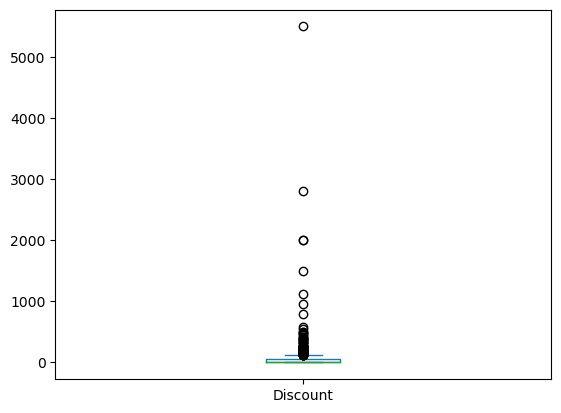

In [97]:
# Frequency distribution table
customer_df['Discount'].plot(kind='box')

<Axes: ylabel='Frequency'>

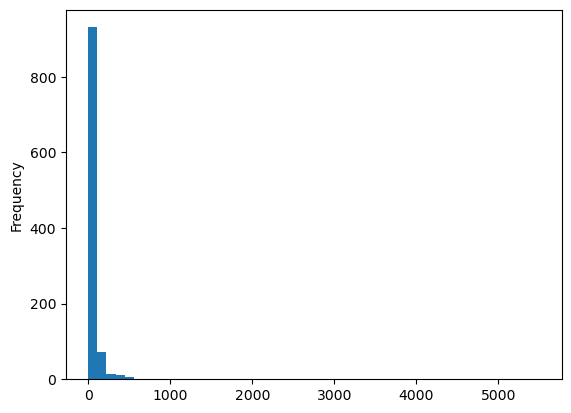

In [98]:
customer_df['Discount'].plot(kind='hist', bins=50)

In [99]:
# Univariate Grand Total:

In [100]:
customer_df['GrandTotal'].describe()

count     1042.000000
mean      1236.332054
std       1447.954096
min          0.000000
25%        600.000000
50%        800.000000
75%       1159.000000
max      19086.000000
Name: GrandTotal, dtype: float64

In [101]:
# Top grand totals
customer_df.sort_values(by='GrandTotal', ascending=False).head(5)

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
457,466,1,2023-02-08,VINEET SUKLA,UP32FA6222,0.0,19086.0,19086,BIKERS CLUB,CM000480,VH000480,CC000001,DISCOVER,WM000001,Ronu,9984961465,1800.0,JC000477,0
1031,12,5470,2023-02-08,VINEET SUKLA,UP32FA6222,1800.0,19000.0,19000,BIKERS CLUB,CM000483,VH000483,CC000001,DISCOVER,WM000001,Ronu,9984961465,2124.0,JC000479,574
1021,1040,1114,2023-07-27,X,UP32JS9752,1500.0,10600.0,10600,BIKERS CLUB,CM001068,VH001068,CC000001,BAJAJ AVENGER,WM000002,Shiv Kumar,0000000000,1500.0,JC001064,99
833,849,916,2023-06-07,SUMIT SINGH,UP32KA9076,1350.0,9500.0,9500,BIKERS CLUB,CM000877,VH000877,CC000001,ACTIVA,WM000008,GROUP,9170759433,1350.0,JC000873,25
751,765,823,2023-05-11,S,UP32EB7126,750.0,8000.0,8000,BIKERS CLUB,CM000788,VH000788,CC000001,HERO SPL+,WM000002,Shiv Kumar,9795902380,750.0,JC000784,336


In [102]:
# dropping the repeated 19000 row
customer_df.drop(459, axis=0, inplace=True)

In [103]:
customer_df['GrandTotal'].describe()

count     1041.000000
mean      1236.605187
std       1448.623204
min          0.000000
25%        600.000000
50%        800.000000
75%       1162.000000
max      19086.000000
Name: GrandTotal, dtype: float64

<Axes: ylabel='Frequency'>

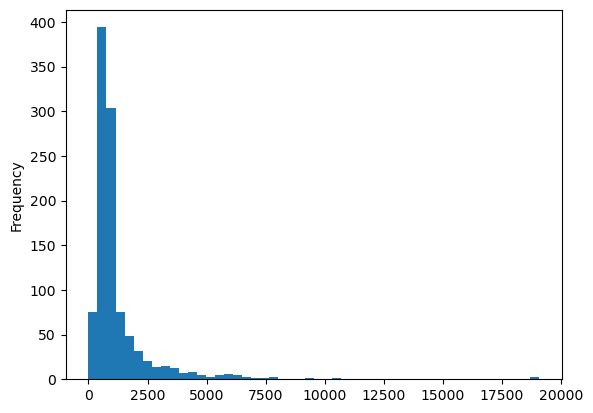

In [104]:
customer_df['GrandTotal'].plot(kind='hist', bins=50)

<Axes: ylabel='Density'>

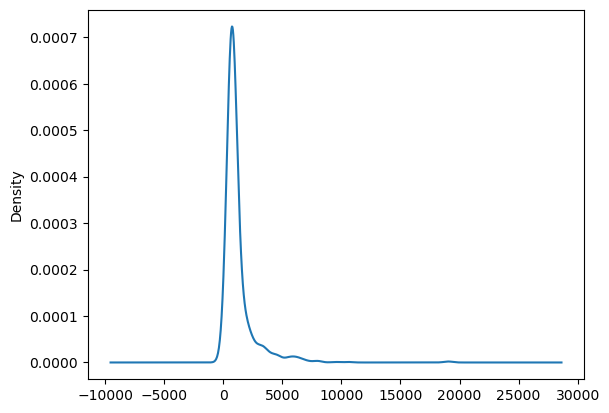

In [105]:
customer_df['GrandTotal'].plot(kind='kde')

In [106]:
# Univariate Labour:

In [107]:
customer_df['Labour'].describe()

count    1041.000000
mean      174.067243
std       230.205647
min         0.000000
25%         0.000000
50%       200.000000
75%       200.000000
max      1800.000000
Name: Labour, dtype: float64

In [108]:
customer_df.sort_values(by='Labour').head(432)

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
1041,22,892,2023-05-30,PAWAN RANE,UP32LC5228,0.0,981.0,981,BIKERS CLUB,CM000842,VH000842,CC000001,ACTIVA,WM000008,GROUP,9415501920,236.0,JC000838,0
738,752,818,2023-05-08,SANDHYA TRIPATHI,UP70AM6739,0.0,5582.0,5582,BIKERS CLUB,CM000773,VH000773,CC000001,TVS SCOOTY PEPT,WM000002,Shiv Kumar,6306235524,650.0,JC000769,0
740,754,819,2023-05-08,MUKESH KUMAR SINGH,UP44J9053,0.0,570.0,570,BIKERS CLUB,CM000775,VH000775,CC000001,HERO SPL+,WM000002,Shiv Kumar,9453510505,200.0,JC000771,0
741,755,816,2023-05-08,DHARMENDRA,UP32AY0063,0.0,650.0,650,BIKERS CLUB,CM000776,VH000776,CC000001,HERO SPL+,WM000004,PANKAJ,8318101741,200.0,JC000772,0
746,760,810,2023-05-09,XBLADE,UP32LC9161,0.0,500.0,500,BIKERS CLUB,CM000781,VH000781,CC000001,HONDA X BLADE,WM000008,GROUP,9936513570,250.0,JC000777,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,30,121,2022-09-18,MUNNA,UP32GY7024,9.0,300.0,300,BIKERS CLUB,CM000032,VH000032,CC000001,SHINA,WM000001,Ronu,9839663267,0.0,JC000030,0
258,264,3510,2022-12-06,SAKEEL,UP32HZ4881,20.0,1000.0,1000,BIKERS CLUB,CM000270,VH000270,CC000001,PASSION PLUS,WM000001,Ronu,6394725704,20.0,JC000267,15
726,740,8030,2023-05-05,SUBAS,UP35BE1181,50.0,900.0,900,BIKERS CLUB,CM000761,VH000761,CC000001,HERO PASSION PRO,WM000002,Shiv Kumar,8081686641,50.0,JC000757,20
293,299,383,2022-12-16,VINISH KUMAR MISHRA,UP32JP9535,50.0,750.0,750,BIKERS CLUB,CM000305,VH000305,CC000001,HERO ISMART 110,WM000004,PANKAJ,8429993053,50.0,JC000302,25


In [109]:
customer_df['Labour'].sum()

181204.0

<Axes: ylabel='Frequency'>

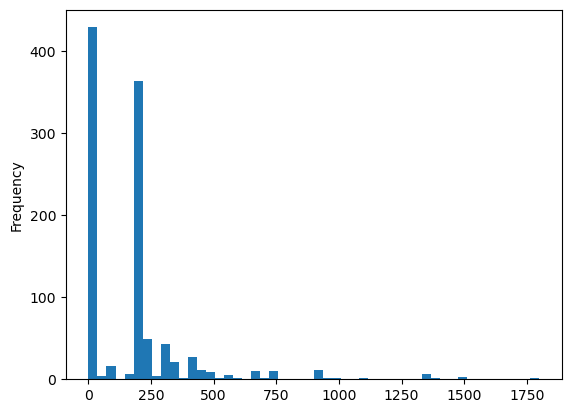

In [110]:
customer_df['Labour'].plot(kind='hist', bins=50)

<Axes: ylabel='Density'>

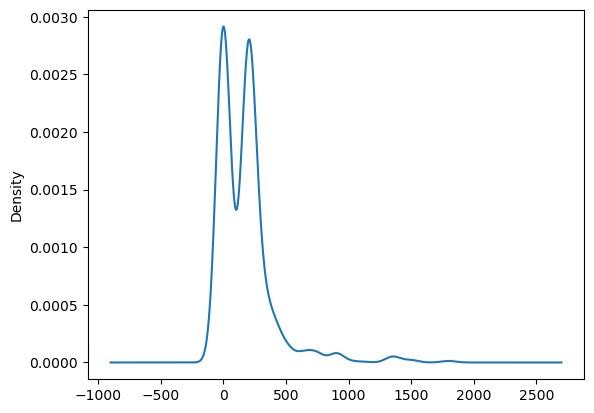

In [111]:
customer_df['Labour'].plot(kind='kde')

In [112]:
# Univariate Parts:

In [113]:
customer_df['Parts'].describe()

count     1041.000000
mean      1230.217099
std       1453.335495
min          0.000000
25%        600.000000
50%        800.000000
75%       1162.000000
max      19086.000000
Name: Parts, dtype: float64

<Axes: ylabel='Frequency'>

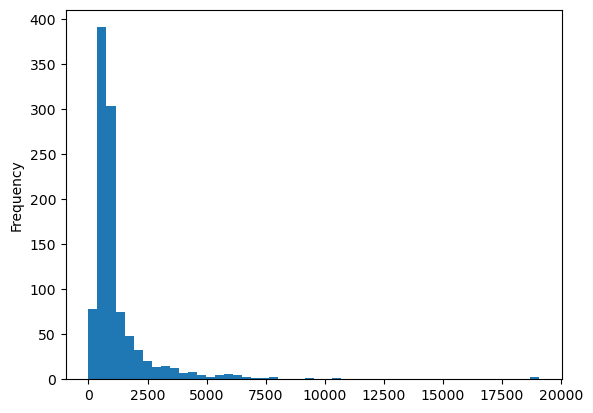

In [114]:
customer_df['Parts'].plot(kind='hist', bins=50)

<Axes: ylabel='Density'>

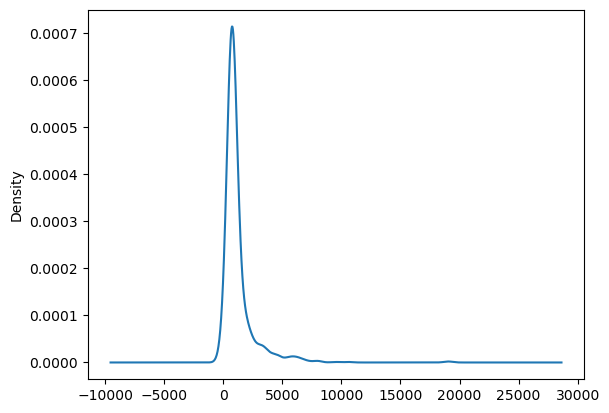

In [115]:
customer_df['Parts'].plot(kind='kde')

In [116]:
# Univariate vWorkerName:

<Axes: >

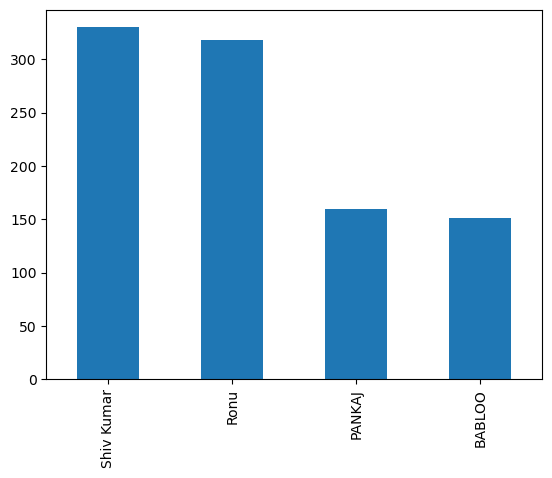

In [117]:
customer_df['vWorkerName'].value_counts()[0:4].plot(kind='bar')

In [118]:
# Univariate Model:

In [119]:
model = customer_df['Model'].value_counts().head(25)

In [120]:
model.head(25)

ACTIVA              210
HERO SPL+            95
PULSAR               50
HERO HF DELUX        46
HERO PASSION PRO     43
HONDA SHINE          43
APACHE               38
SUPER SPLENDER       34
MASTERO              29
JUPITER              29
SUPER                25
DISCOVER             23
PASS.X.PRO           20
HF DELUXE            19
TVS SPORT            19
PLEASURE             18
RE CLASSIC 350       17
GLAMOUR              17
BAJAJ AVENGER        14
PLATINA              14
YAMAHA FZ-S          13
SPL PRO              11
HERO MESTRO           8
TVS SCOOTY PEPT       7
HONDA SP 125          7
Name: Model, dtype: int64

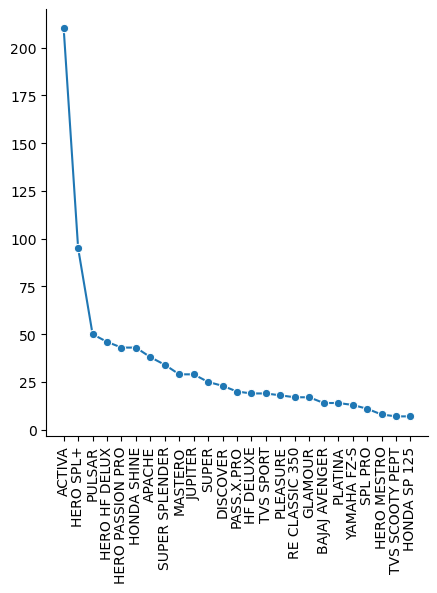

In [121]:
sns.relplot(data=model.head(25), x=model.index, y=model.values, kind='line', marker='o').set_xticklabels(rotation=90)

In [122]:
# Univariate Reg_no:

In [123]:
customer_df.value_counts('Reg_no').head(4)

Reg_no
UPX           7
UP32KF5110    6
UP31AB6634    5
UP36C2853     4
dtype: int64

In [124]:
customer_df[customer_df['Reg_no'] == 'UPX']

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
431,440,512,2023-01-29,ROY,UPX,200.0,560.0,560,BIKERS CLUB,CM000447,VH000447,CC000001,ACTIVA,WM000004,PANKAJ,7081564882,200.0,JC000444,33
517,526,566,2023-02-28,ROY,UPX,200.0,800.0,800,BIKERS CLUB,CM000542,VH000542,CC000001,ACTIVA,WM000004,PANKAJ,7081564882,200.0,JC000538,50
794,808,875,2023-05-24,ROY,UPX,200.0,800.0,800,BIKERS CLUB,CM000832,VH000832,CC000001,ACTIVA,WM000002,Shiv Kumar,7081564882,200.0,JC000828,30
825,841,872,2023-05-31,ROY,UPX,0.0,3000.0,3000,BIKERS CLUB,CM000869,VH000869,CC000001,ACTIVA,WM000008,GROUP,7081564882,650.0,JC000865,0
826,842,889,2023-05-31,ROY,UPX,0.0,3000.0,3000,BIKERS CLUB,CM000870,VH000870,CC000001,ACTIVA,WM000007,BABLOO,7081564882,400.0,JC000866,0
889,905,970,2023-06-19,ROY,UPX,0.0,790.0,790,BIKERS CLUB,CM000933,VH000933,CC000001,ACTIVA,WM000008,GROUP,7081564882,200.0,JC000929,0
1016,1034,1105,2023-07-26,ROY,UPX,200.0,0.0,200,BIKERS CLUB,CM001062,VH001062,CC000001,ACTIVA,WM000002,Shiv Kumar,7081564882,200.0,JC001058,0


In [125]:
# dropping the repeated row
customer_df.drop(830, axis=0, inplace=True)

In [126]:
# Univariate Reg_no:

In [127]:
customer_df.groupby(['vCustomerName', 'vMobile']).count().sort_values('Reg_no', ascending=False).head(10)

,,cInvoiceCode,JobtypeNo,Jdate,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,totalLaborwithtax,JobcardNo,Discount
vCustomerName,vMobile,,,,,,,,,,,,,,,,,
ANITA,8318434232,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
ROY,7081564882,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
RAMESH,6394119184,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
KRIPARAM PANDAY,9919846852,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
SHIVANKAR MISHRA,9140831987,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
RAKESH,8874831800,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
SATYA PRAKASH,9936404429,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
DEEPAK,9838181780,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
ANIL,8181813925,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [128]:
customer_df[customer_df['vMobile'] == '8874831800'].sum()

C:\Users\amrit\AppData\Local\Temp\ipykernel_19540\3736689925.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer_df[customer_df['vMobile'] == '8874831800'].sum()


cInvoiceCode                                                      1706
JobtypeNo                                                        11938
vCustomerName                           RAKESHRAKESHRAKESHRAKESHRAKESH
Reg_no               UP32GM8026UP32HZ1747UP32HZ1747UP32HZ1747UP32HZ...
Labour                                                          1350.0
Parts                                                           5672.0
GrandTotal                                                        5672
VCompanyName         BIKERS CLUBBIKERS CLUBBIKERS CLUBBIKERS CLUBBI...
cCustomerCode                 CM000149CM000171CM000366CM000457CM000602
VehicelID                     VH000149VH000171VH000366VH000457VH000602
cCompanyCode                  CC000001CC000001CC000001CC000001CC000001
Model                HONDA DREAM YUGAPASS.X.PROPASS.X.PROHERO PASSI...
cWorkerCode                   WM000001WM000002WM000001WM000002WM000001
vWorkerName                           RonuShiv KumarRonuShiv KumarRonu
vMobil

In [129]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,VH000002,CC000001,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,VH000003,CC000001,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,VH000004,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,VH000005,CC000001,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,VH000006,CC000001,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,VH000785,CC000001,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0
1038,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,VH000786,CC000001,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0
1039,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,VH000790,CC000001,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0
1040,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,VH000841,CC000001,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161


In [130]:
# date wise servicing

In [131]:
customer_df['year'] = customer_df['Jdate'].dt.year

In [132]:
customer_df['month'] = customer_df['Jdate'].dt.month_name()

In [133]:
customer_df['day'] = customer_df['Jdate'].dt.day_name()

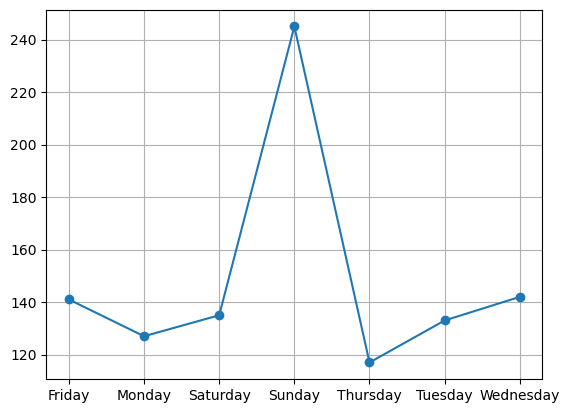

In [134]:
plt.plot(customer_df.groupby('day')['cInvoiceCode'].count(), marker='o')
plt.grid()

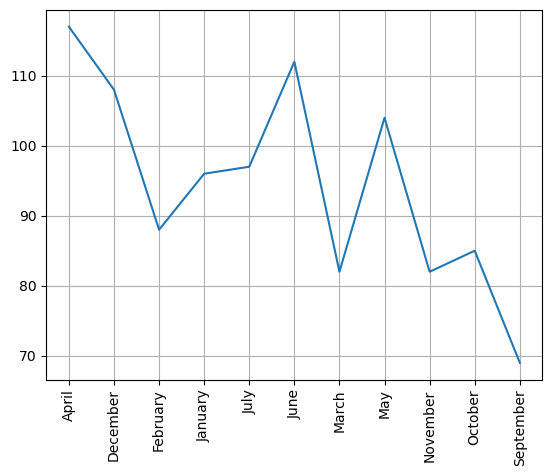

In [135]:
plt.plot(customer_df.groupby('month')['cInvoiceCode'].count())
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [136]:
# Save date ranges
datec_1 = customer_df['Jdate'].dt.day <= 15

In [137]:
datec_2 = ~datec_1

In [138]:
ac = customer_df[datec_1]

In [139]:
bc = customer_df[datec_2]

In [140]:
aac = ac.groupby(ac['Jdate'].dt.date)['cInvoiceCode'].count()

In [141]:
bbc = bc.groupby(bc['Jdate'].dt.date)['cInvoiceCode'].count()

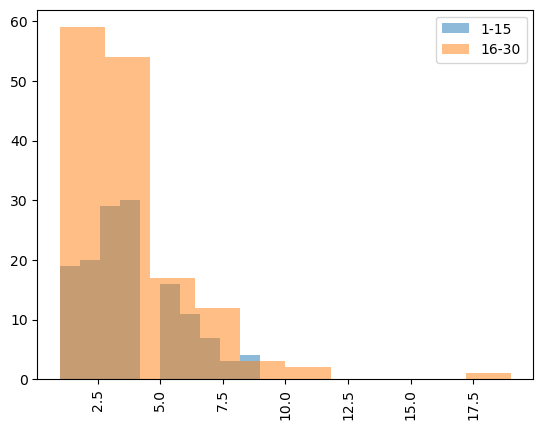

In [142]:
plt.hist(aac, label='1-15', alpha=0.5)
plt.hist(bbc, label='16-30', alpha=0.5)
plt.xticks(rotation = 90)
plt.legend()

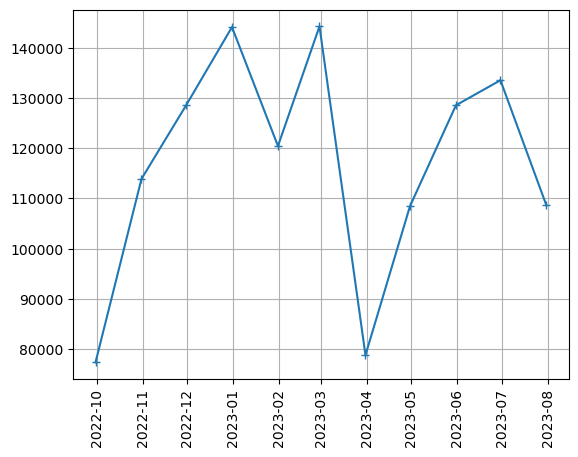

In [143]:
growth = customer_df.resample('m', on='Jdate')['GrandTotal'].sum()
plt.plot(growth, marker='+')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Items list

In [144]:
items_df.sample(5)

,JobcardNo,Jdate,Qty,PartCode1,cCompanyCode,vItemName
2365,JC000569,2023-03-12,1,IM000710,CC000001,CASTROL ACTIVE ESSENTIAL 0.9L
1629,JC001064,2023-07-27,1,IM000597,CC000001,TIMING CHAIN ADJUSTER
3222,JC000682,2023-04-13,1,IM000217,CC000001,BEARING 6301
3458,JC000769,2023-05-08,1,IM000801,CC000001,CYLINDER KIT SCCOOTY PEP+
1659,JC000133,2022-10-22,1,IM000451,CC000001,BATTRY 4LB


In [145]:
# setting date as index
items_df.set_index('Jdate', inplace=True)

In [146]:
# sorted on base of date
items_df.sort_index(inplace=True)

In [147]:
# extracting months
items_df['month'] = items_df.index.month_name()

In [148]:
items_df['day'] = items_df.index.day_name()

In [149]:
items_df.head(10)

,JobcardNo,Qty,PartCode1,cCompanyCode,vItemName,month,day
Jdate,,,,,,,
2022-09-07,JC000001,1,IM000096,CC000001,PLATE FRICTION BAJAJ (PULSAR UG4),September,Wednesday
2022-09-07,JC000001,1,IM000041,CC000001,INDICATOR (PLATINA WHITE),September,Wednesday
2022-09-07,JC000001,1,IM000051,CC000001,BRAKE SHOE (PULSAR),September,Wednesday
2022-09-07,JC000001,1,IM000112,CC000001,AIR FILTER MINDA (PULSAR UG4),September,Wednesday
2022-09-07,JC000001,1,IM000214,CC000001,CASTROL POWER 1 CRUSE 20W-50,September,Wednesday
2022-09-07,JC000001,1,IM000101,CC000001,PLATE CLUTCH PRESSURE BAJAJ (PULSAR 150),September,Wednesday
2022-09-07,JC000001,1,IM000095,CC000001,CENTRE CLUTCH BAJAJ (PULSAR 150),September,Wednesday
2022-09-08,JC000002,1,IM000053,CC000001,BRAKE SHOE (JUPITER/WEGO),September,Thursday
2022-09-08,JC000002,1,IM000221,CC000001,CASTROL ACTIVE HONDA 10W30,September,Thursday


In [150]:
item_dt = items_df.groupby('Jdate').sum()

C:\Users\amrit\AppData\Local\Temp\ipykernel_19540\2361390973.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  item_dt = items_df.groupby('Jdate').sum()


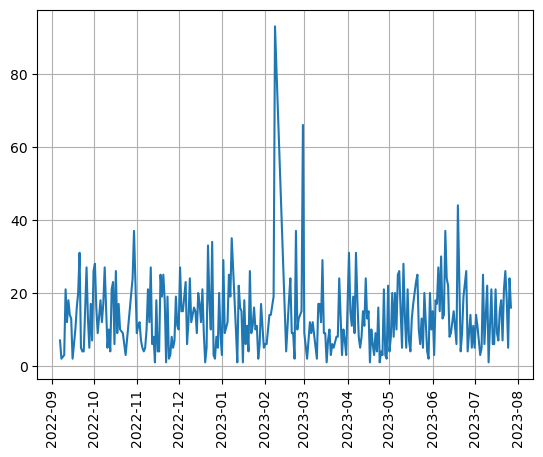

In [151]:
# item consumption by time
plt.plot(item_dt.index, item_dt.values)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [152]:
# item consumption by month
item_dt = items_df.groupby('month').sum()

C:\Users\amrit\AppData\Local\Temp\ipykernel_19540\3648910900.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  item_dt = items_df.groupby('month').sum()


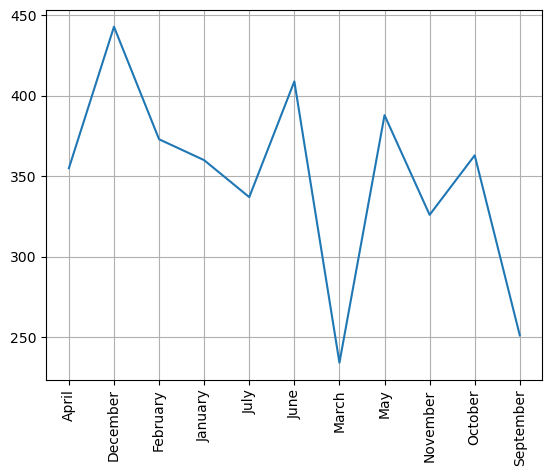

In [153]:
plt.plot(item_dt.index, item_dt.values)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [154]:
# item consumption by day
item_dt = items_df.groupby('day').sum()

C:\Users\amrit\AppData\Local\Temp\ipykernel_19540\973203298.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  item_dt = items_df.groupby('day').sum()


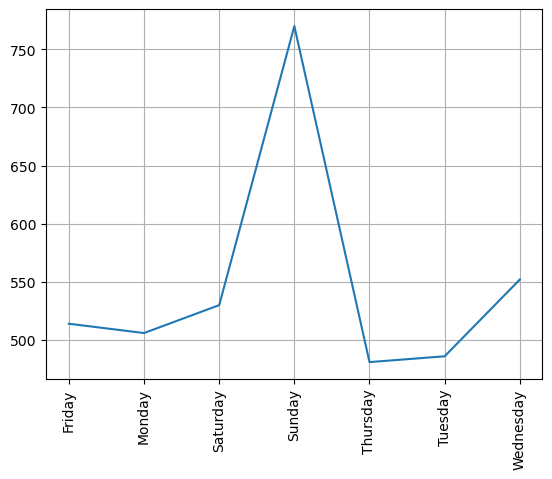

In [155]:
plt.plot(item_dt.index, item_dt.values)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [156]:
# item consumption by start / end

In [157]:
items_df['vItemName'].value_counts()

CASTROL ACTIVE 4T 20W40 0.9L    239
CASTROL ACTIVE HONDA 10W30      116
CASTROL ACTIV 4T 20W40           98
DRUM BOLT                        73
CASTROL ACTIVE SCOOTER           73
                               ... 
HAND GRIP (SONAL)                 1
HEAD PACKING                      1
CARBURETOR BAJAJ AVENGER          1
INDICATOR AVENGER 150             1
CLUTCH ASSY PULSAR 220            1
Name: vItemName, Length: 668, dtype: int64

In [158]:
items_df

,JobcardNo,Qty,PartCode1,cCompanyCode,vItemName,month,day
Jdate,,,,,,,
2022-09-07,JC000001,1,IM000096,CC000001,PLATE FRICTION BAJAJ (PULSAR UG4),September,Wednesday
2022-09-07,JC000001,1,IM000041,CC000001,INDICATOR (PLATINA WHITE),September,Wednesday
2022-09-07,JC000001,1,IM000051,CC000001,BRAKE SHOE (PULSAR),September,Wednesday
2022-09-07,JC000001,1,IM000112,CC000001,AIR FILTER MINDA (PULSAR UG4),September,Wednesday
2022-09-07,JC000001,1,IM000214,CC000001,CASTROL POWER 1 CRUSE 20W-50,September,Wednesday
...,...,...,...,...,...,...,...
2023-07-27,JC001064,1,IM000597,CC000001,TIMING CHAIN ADJUSTER,July,Thursday
2023-07-27,JC001064,1,IM000845,CC000001,TIMING CHAIN,July,Thursday
2023-07-27,JC001064,1,IM000292,CC000001,WALL/WALL SEAL KIT,July,Thursday


In [159]:
# assigning year
items_df['year'] = items_df.index.year

In [160]:
items_df

,JobcardNo,Qty,PartCode1,cCompanyCode,vItemName,month,day,year
Jdate,,,,,,,,
2022-09-07,JC000001,1,IM000096,CC000001,PLATE FRICTION BAJAJ (PULSAR UG4),September,Wednesday,2022
2022-09-07,JC000001,1,IM000041,CC000001,INDICATOR (PLATINA WHITE),September,Wednesday,2022
2022-09-07,JC000001,1,IM000051,CC000001,BRAKE SHOE (PULSAR),September,Wednesday,2022
2022-09-07,JC000001,1,IM000112,CC000001,AIR FILTER MINDA (PULSAR UG4),September,Wednesday,2022
2022-09-07,JC000001,1,IM000214,CC000001,CASTROL POWER 1 CRUSE 20W-50,September,Wednesday,2022
...,...,...,...,...,...,...,...,...
2023-07-27,JC001064,1,IM000597,CC000001,TIMING CHAIN ADJUSTER,July,Thursday,2023
2023-07-27,JC001064,1,IM000845,CC000001,TIMING CHAIN,July,Thursday,2023
2023-07-27,JC001064,1,IM000292,CC000001,WALL/WALL SEAL KIT,July,Thursday,2023


In [161]:
# Save date ranges
date_1 = items_df.index.day <= 15

In [162]:
date_2 = ~date_1

In [163]:
a = items_df[date_1]

In [164]:
b = items_df[date_2]

In [165]:
aa = a.groupby(a.index.date)['Qty'].sum()

In [166]:
bb = b.groupby(b.index.date)['Qty'].sum()

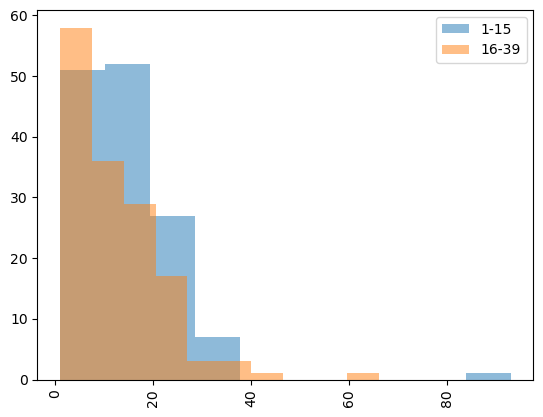

In [167]:
plt.hist(aa, label='1-15', alpha=0.5)
plt.hist(bb, label='16-39', alpha=0.5)
plt.xticks(rotation = 90)
plt.legend()

In [168]:
# Engine oil consumption per month

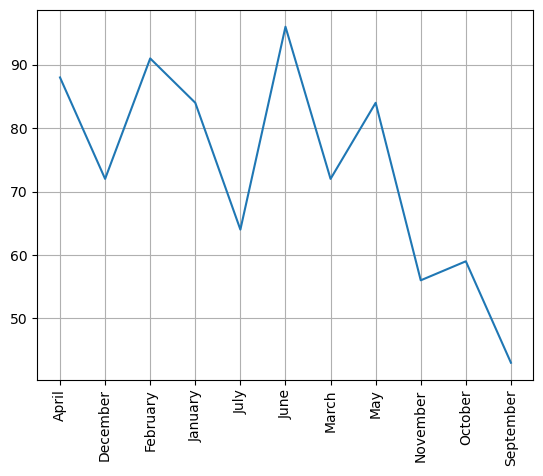

In [169]:
engine_oil = items_df[items_df['vItemName'].str.contains('CASTROL')].groupby('month')['Qty'].sum()
plt.plot(engine_oil)
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [170]:
# Engine work month wise

In [171]:
engine = items_df[items_df['vItemName'] == 'WALL/WALL SEAL KIT']

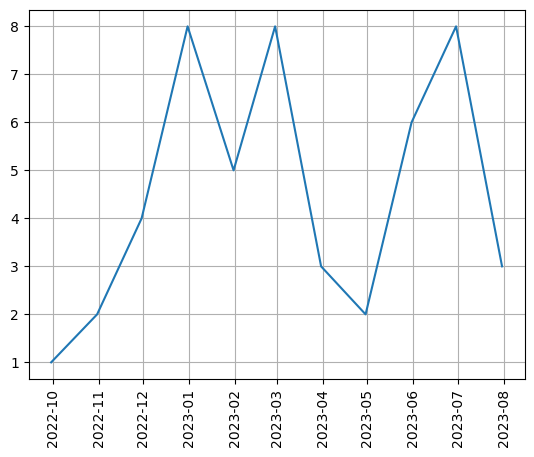

In [172]:
plt.plot(engine.resample('m')['Qty'].sum())
plt.xticks(rotation=90)
plt.grid()

In [173]:
# Sales of good

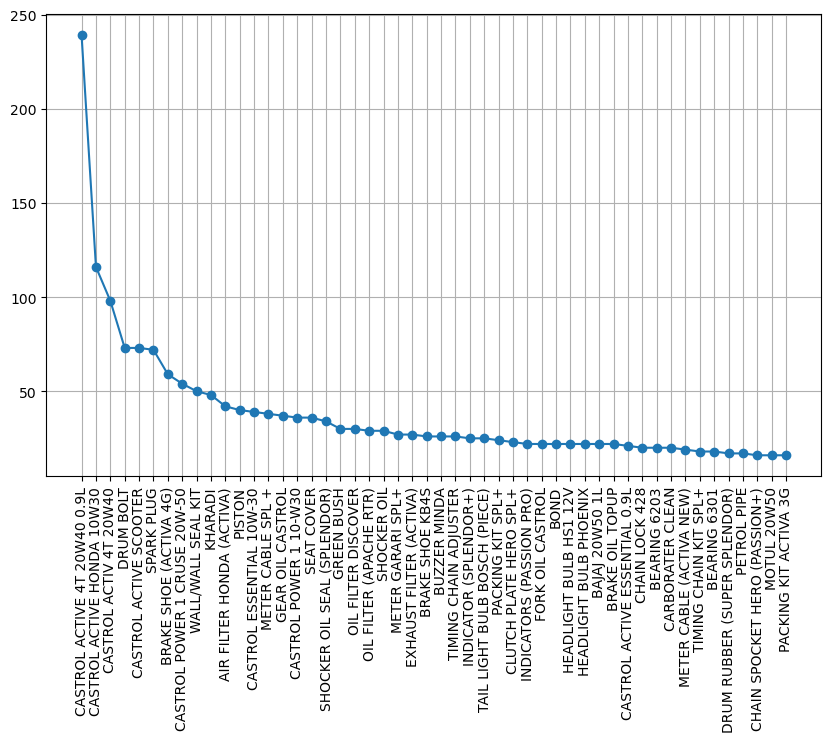

In [174]:
items_df['vItemName'].value_counts().head(50)
plt.figure(figsize=(10,6))
plt.plot(items_df['vItemName'].value_counts().head(50), marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Bi

In [175]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,year,month,day
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266,2022,September,Wednesday
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46,2022,September,Thursday
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70,2022,September,Saturday
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28,2022,September,Saturday
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60,2022,September,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0,2023,May,Thursday
1038,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0,2023,May,Thursday
1039,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0,2023,May,Friday
1040,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161,2023,May,Monday


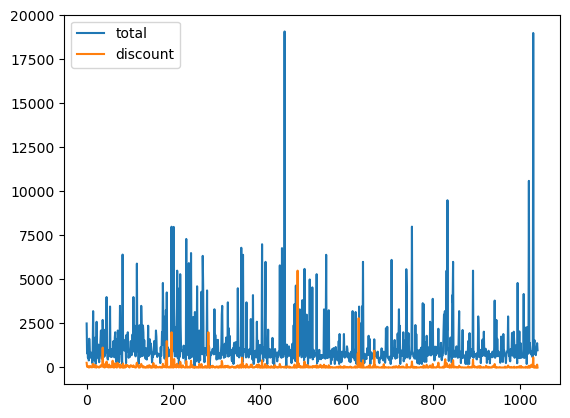

In [176]:
 # labour vs parts vs total vs discount
plt.plot(customer_df['GrandTotal'], label='total')
plt.plot(customer_df['Discount'], label='discount')
plt.legend()

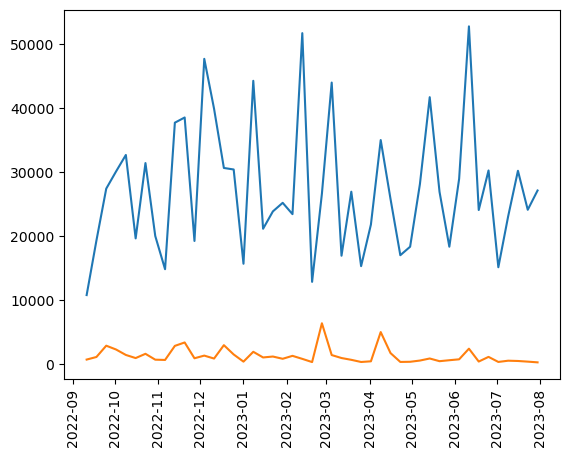

In [177]:
plt.plot(customer_df.resample('W', on='Jdate')['GrandTotal'].sum())
plt.xticks(rotation=90)
plt.plot(customer_df.resample('W', on='Jdate')['Discount'].sum())
plt.xticks(rotation=90)
plt.show()

In [178]:
# comparing performance of the mechanics

<Axes: xlabel='vWorkerName'>

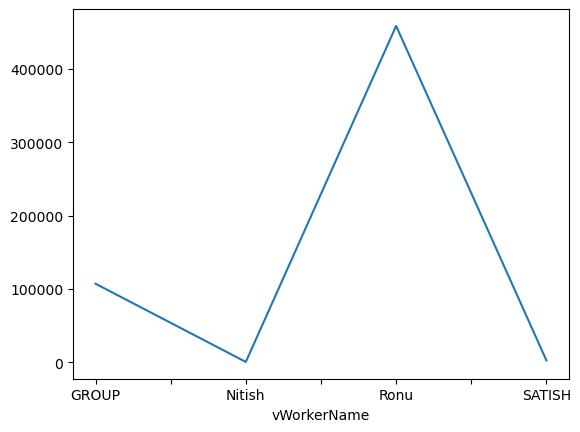

In [181]:
customer_df.groupby('vWorkerName')['GrandTotal'].sum()[[1, 2, 4, 5]].plot()

In [182]:
repeat = customer_df.groupby(['vWorkerName', 'vCustomerName']).count().sort_values(by='cInvoiceCode', ascending=False)['cInvoiceCode'].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


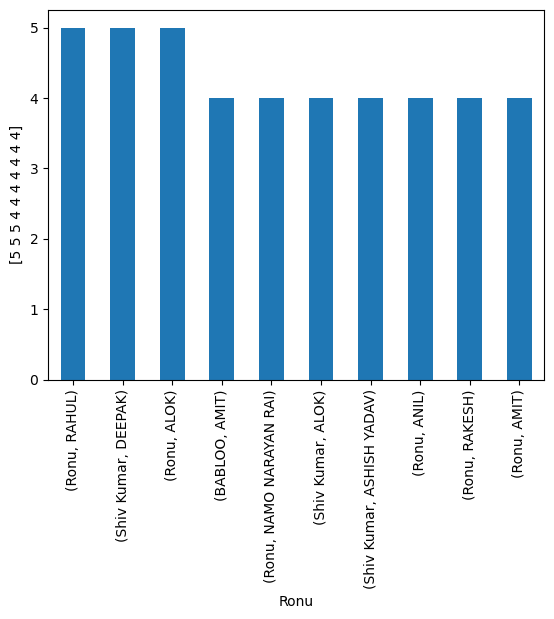

In [183]:
repeat.plot(kind='bar', legend=False)
plt.xlabel(repeat.index.get_level_values(0).unique()[0])
plt.ylabel(repeat.values)
plt.show()

In [184]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,year,month,day
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266,2022,September,Wednesday
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46,2022,September,Thursday
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70,2022,September,Saturday
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28,2022,September,Saturday
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60,2022,September,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0,2023,May,Thursday
1038,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0,2023,May,Thursday
1039,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0,2023,May,Friday
1040,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161,2023,May,Monday


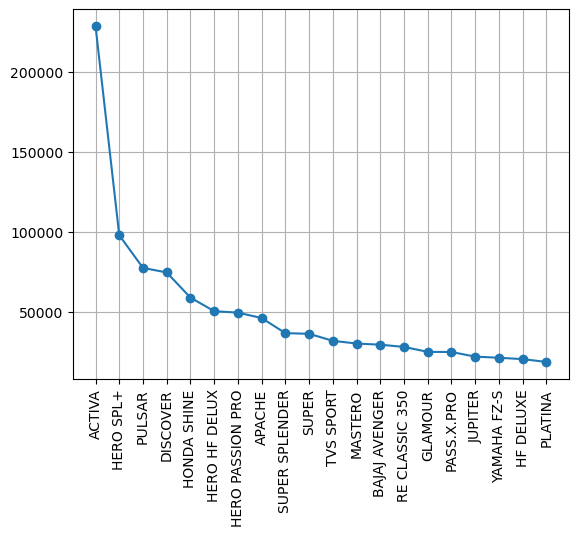

In [185]:
# bikes with date
bikes = customer_df.groupby('Model')['GrandTotal'].sum().sort_values(ascending=False).head(20)
plt.plot(bikes, marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [186]:
# top 5 bikes with time
top_5_bikes = ['ACTIVA', 'HERO SPL+', 'PULSAR', 'HONDA SHINE', 'RE CLASSIC 350']
activa = customer_df[customer_df['Model'] == 'ACTIVA']

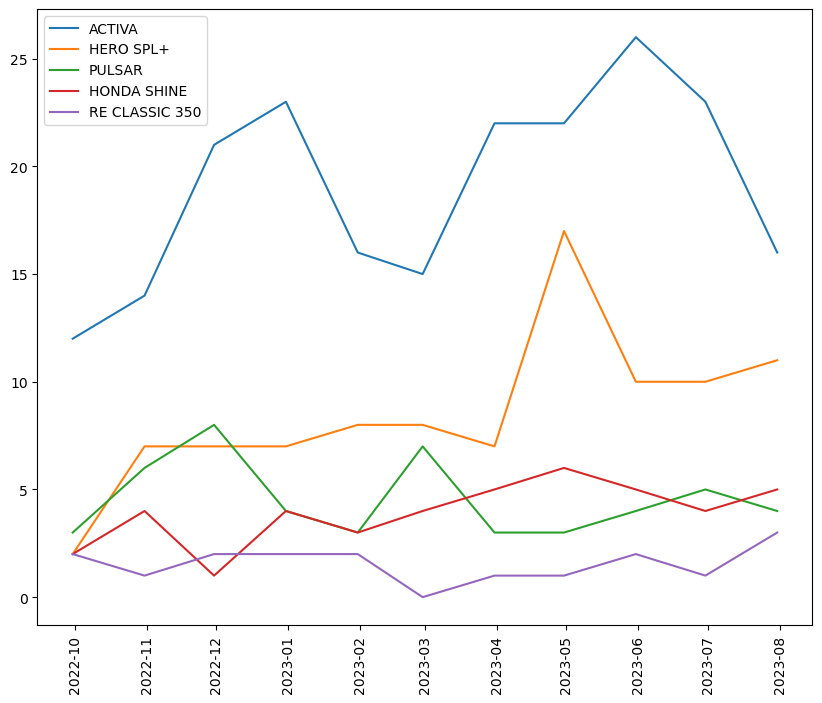

In [187]:
plt.figure(figsize=(10,8))
for i in top_5_bikes:
    a = customer_df[customer_df['Model'] == i]
    plt.plot(a.resample('m', on='Jdate').count()['cInvoiceCode'], label=i)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [188]:
# top 5 items other than engine oil

In [189]:
item_list = items_df[~items_df['vItemName'].str.contains('CASTROL')].groupby('vItemName')['Qty'].sum().sort_values(ascending=False).head(30)

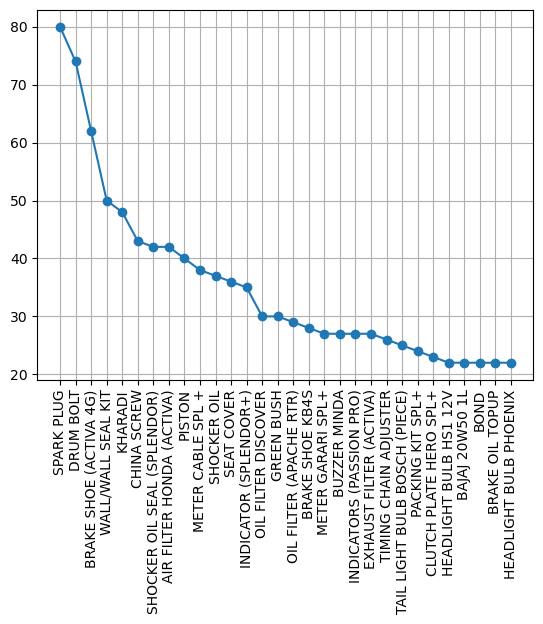

In [190]:
plt.plot(item_list, marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [191]:
top_12_items = list(item_list.index)[0:5]

C:\Users\amrit\AppData\Local\Temp\ipykernel_19540\2344744608.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(a.resample('m').sum()['Qty'], label=i)
C:\Users\amrit\AppData\Local\Temp\ipykernel_19540\2344744608.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(a.resample('m').sum()['Qty'], label=i)
C:\Users\amrit\AppData\Local\Temp\ipykernel_19540\2344744608.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the f

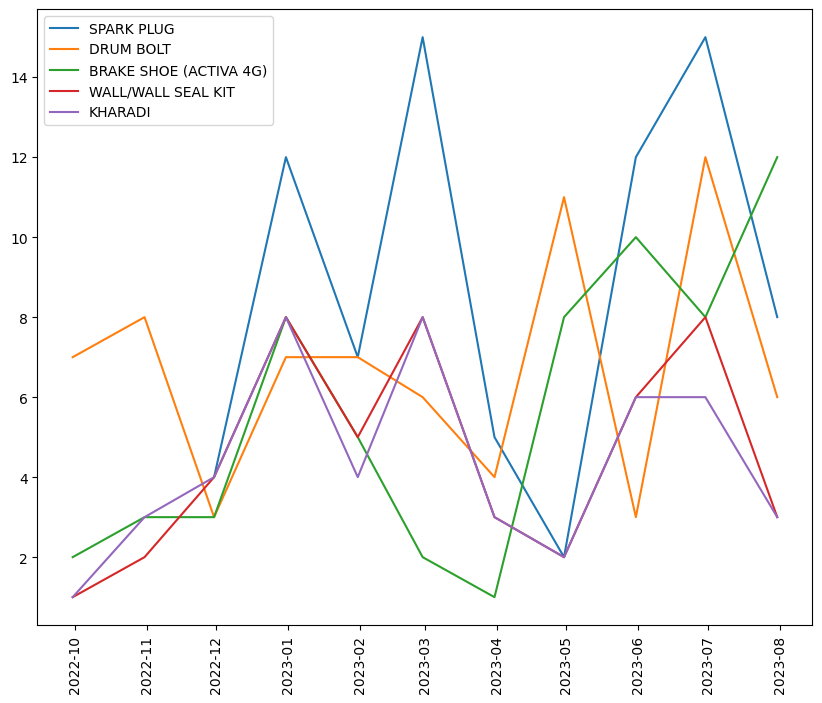

In [192]:
plt.figure(figsize=(10,8))
for i in top_12_items:
    a = items_df[items_df['vItemName'] == i]
    plt.plot(a.resample('m').sum()['Qty'], label=i)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [193]:
items_df

,JobcardNo,Qty,PartCode1,cCompanyCode,vItemName,month,day,year
Jdate,,,,,,,,
2022-09-07,JC000001,1,IM000096,CC000001,PLATE FRICTION BAJAJ (PULSAR UG4),September,Wednesday,2022
2022-09-07,JC000001,1,IM000041,CC000001,INDICATOR (PLATINA WHITE),September,Wednesday,2022
2022-09-07,JC000001,1,IM000051,CC000001,BRAKE SHOE (PULSAR),September,Wednesday,2022
2022-09-07,JC000001,1,IM000112,CC000001,AIR FILTER MINDA (PULSAR UG4),September,Wednesday,2022
2022-09-07,JC000001,1,IM000214,CC000001,CASTROL POWER 1 CRUSE 20W-50,September,Wednesday,2022
...,...,...,...,...,...,...,...,...
2023-07-27,JC001064,1,IM000597,CC000001,TIMING CHAIN ADJUSTER,July,Thursday,2023
2023-07-27,JC001064,1,IM000845,CC000001,TIMING CHAIN,July,Thursday,2023
2023-07-27,JC001064,1,IM000292,CC000001,WALL/WALL SEAL KIT,July,Thursday,2023


In [194]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,year,month,day
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266,2022,September,Wednesday
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46,2022,September,Thursday
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70,2022,September,Saturday
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28,2022,September,Saturday
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60,2022,September,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0,2023,May,Thursday
1038,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0,2023,May,Thursday
1039,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0,2023,May,Friday
1040,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161,2023,May,Monday


<Axes: xlabel='GrandTotal', ylabel='Discount'>

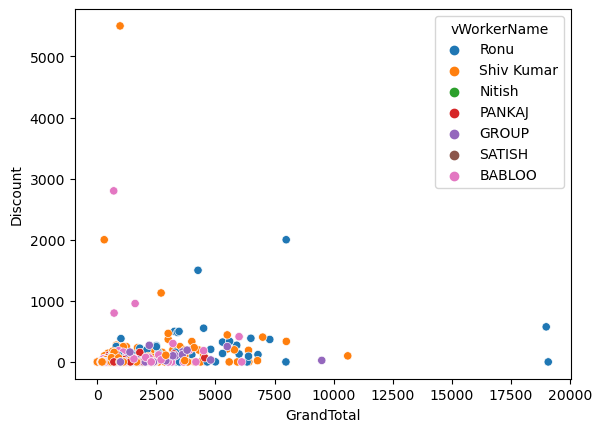

In [195]:
# plt.scatter(customer_df['GrandTotal'], customer_df['Discount'], hue='vWorkerName')
sns.scatterplot(customer_df, x='GrandTotal', y='Discount', hue='vWorkerName')